# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [70]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [71]:
pd.__version__

'1.3.3'

**Our comments:** 

Currently running with the most recent version of pandas. Therefore we can specify the `on_bad_lines` parameter.

For the tsv file, as a first step we need to set the seperator in read_csv to '\t', which equals a tab for the tsv file. Also as suggested, we decided to set on_bad_lines to 'skip', hence, lines that do not match the format of the first row in the tsv file are ignored. As can be seen by the filename, `'data.tsv.gz'`, we load the uncompressed file.

In [72]:
data_folder = './data/'
filename = 'data.tsv.gz'

# Loading dataframe and printing the first 5 rows
data = pd.read_csv(data_folder + filename, sep='\t', on_bad_lines='skip')
data.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


**Our comments:**

We further see from the shape that there is 13497 policies registered in the raw data.

In [73]:
data.shape

(13497, 11)

### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

**Our comments (Task 2.1):**

First of all we verify that there are duplicate rows with the same policy identifier in the dataframe, `data`, by checking the is_unique property of the ids of the dataframe. False in this case tells us that there are duplicate ids, which implies duplicate rows. 
    

In [74]:
data.id.is_unique

False

**Our comments (Task 2.1 - continued):**

We use the pandas function `duplicated()` to determine which rows contains a duplicated 'id'. By setting the parameter `keep` to `'first'` the returned duplicate indeces are the indeces of second (or more) time an id occurs. The first following code-box prints a dataframe of the duplicates that needs to be removed. In the second following code box these rows are removed and we check whether the indeces are now unique.

In [75]:
# check for duplicate policies
data[data.duplicated(subset='id', keep='first')]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
14,Sign Bottom,14,83443,105094,NaN,NaN,NaN,NaN,NaN,NaN,1
333,Sign Bottom,332,1721,30093,30482.0,38315.0,NaN,NaN,NaN,NaN,2
751,Sign Top,749,101625,148134,135926.0,164660.0,NaN,NaN,NaN,NaN,2
1107,Sign Bottom,1104,114740,146569,NaN,NaN,NaN,NaN,NaN,NaN,1
1380,Sign Bottom,1376,46097,95235,NaN,NaN,NaN,NaN,NaN,NaN,1
1536,Sign Bottom,1531,72973,116284,NaN,NaN,NaN,NaN,NaN,NaN,1
1780,Sign Top,1774,21000,70058,NaN,NaN,NaN,NaN,NaN,NaN,1
2143,Sign Bottom,2136,13061,25046,NaN,NaN,NaN,NaN,NaN,NaN,1
13459,Sign Top,13451,10744,30334,60488.0,93297.0,NaN,NaN,NaN,NaN,2


In [76]:
# remove rows with duplicate policies
data = data.drop_duplicates(subset='id', keep='first')
data.id.is_unique

True

**Our comments (Task 2.1 - continued):**

Before the shape was 13497 and is now 13488 - thus, 9 rows were deleted due to duplicate policies.

In [77]:
data.shape

(13488, 11)

---

**Our comments (Task 2.2):**

We regard the task of verifying which rows satisfy the requirements for subpoint 2) mentioned in the description as a filtering task. Thus, we want to apply the following boolean filter to each row in the dataframe to determine if they are to be kept or disregarded. To achieve that, we first write the filter function filter_anomalous, which returns True when the row is not anomalous and therefore kept. Afterwards, we filter the data by indexing with filter_anomalous applied to the dataframe. This gives us a boolean Series, with which we then only keep the non-anomalous rows.

Our filter checks precisely to conditions: 
1. check if baseline_motorcyclei != Nan <=> update_motorcyclei != Nan (1 <= i <= 4)
2. check if (max i for which baseline_motorcylcei != Nan) == motorcycle_count

As the description of the data mentions that "When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled", we decided to also filter examples out where the number of baseline and update motorcycles actually matches the motorcycle_count, but there are some gaps in the filled columns (i.e. say motorcycle_count == 2 and columns baseline/update_motorcycle 1 and 3 were filled, compare e.g. id 64), as can be seen below.

In [78]:
# visualization of mentioned example of id no. 64
data.loc[63:67]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
63,Sign Top,63,94162,112348,NaN,NaN,NaN,NaN,NaN,NaN,1
64,Sign Top,64,78704,109065,NaN,NaN,17406.0,34540.0,NaN,NaN,2
65,Sign Bottom,65,59970,89440,64900.0,83080.0,NaN,NaN,NaN,NaN,2
66,Sign Bottom,66,86465,123221,NaN,NaN,NaN,NaN,NaN,NaN,1
67,Sign Top,67,15,5037,NaN,NaN,NaN,NaN,NaN,NaN,1


In [79]:
def filter_anomalous(row):
    """
    Returns True if row is not anomalous,
    i.e. all policies kept the number of motorcycles and number of kilometrage readings equals motorcycle_count; 
    False otherwise
    """
    no_of_cycles = 0
    
    # range including 1-4 due to number of owned motorcycle
    for i in range(1,5):
        if (pd.isna(row['baseline_motorcycle{}'.format(i)]) and pd.notna(row['update_motorcycle{}'.format(i)])) \
            or (pd.notna(row['baseline_motorcycle{}'.format(i)]) and pd.isna(row['update_motorcycle{}'.format(i)])):
                return False
        if pd.notna(row['baseline_motorcycle{}'.format(i)]) and pd.notna(row['update_motorcycle{}'.format(i)]):
            no_of_cycles = i
    if row['motorcycle_count'] != no_of_cycles:
        return False
    return True

In [80]:
# filtering out rows with a mismatch between baseline_motorcycle and update_motorcycle
data = data[data.apply(filter_anomalous, axis=1)]

# e.g. id 64 is now removed
data.loc[63:67]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
63,Sign Top,63,94162,112348,NaN,NaN,NaN,NaN,NaN,NaN,1
65,Sign Bottom,65,59970,89440,64900.0,83080.0,NaN,NaN,NaN,NaN,2
66,Sign Bottom,66,86465,123221,NaN,NaN,NaN,NaN,NaN,NaN,1
67,Sign Top,67,15,5037,NaN,NaN,NaN,NaN,NaN,NaN,1


**Our comments (Task 2.2 - continued)**

Again the dataframe was reduced - now containing 12598 policies.

In [81]:
data.shape

(12598, 11)

---

**Our comments (Task 2.3):**

We now want to investigate whether the data is affected by outliers in the variables containing information on kilometrages.
As a start we will visualize the boxplots of these variables. For this purpose, a function is created as we want to reapply the function after removing potential outliers to see if it made a difference.

In [82]:
def plot_boxplots(data, return_stats=True):
    """ Function that plots boxplots. 
    One plot where each attribute is in a subplot to visualize the outliers.
    Another plot for visualizing the boxplots of the attributes together for comparison.
    
    """
    
    # Plot with subplots
    nrows, ncols = (4, 2)
    stats_ = {}
    fig, axs = plt.subplots(nrows, ncols, figsize=(16,12), sharex=True, sharey=True)

    colors = ['darkgrey', 'darkgrey', 'lightsteelblue', 'lightsteelblue', 'lightblue', 'lightblue', 'C0', 'C0']
    
    for plot_idx, i in enumerate(list(range(2, 9, 2))):
        # Getting Pandas-series for baseline_motorcycle(i) and update_motorcycle(i)
        baseline_col = data.iloc[:, i][~np.isnan(data.iloc[:, i+1])]
        update_col = data.iloc[:, i+1][~np.isnan(data.iloc[:, i+1])]

        # Plots histogram of baseline_motorcycle(i)
        plt.subplot(nrows, ncols, 2*plot_idx+1)
        plot1 = plt.boxplot(baseline_col[baseline_col <= baseline_col.max()], patch_artist=True)  
        plt.title(baseline_col.name)

        # Plots histogram of update_motorcycles(i)
        plt.subplot(nrows, ncols, 2*plot_idx+2)
        plot2 = plt.boxplot(update_col[update_col <= update_col.max()], patch_artist=True) 
        plt.title(update_col.name)
        
        # Calculate mean and median
        if return_stats:
            stats_[baseline_col.name] = baseline_col.mean(), baseline_col.median()
            stats_[update_col.name] = update_col.mean(), update_col.median()
         
        plot1['boxes'][0].set_color(colors[plot_idx*2])
        plot2['boxes'][0].set_color(colors[plot_idx*2])
        
        
    plt.show()
    
    # Comparative plot
    boxplot_data = [(column_name, data[column_name][~np.isnan(data[column_name])]) for column_name in data.iloc[:, 2:10]]
    boxplot_data = list(zip(*boxplot_data))
    
    fig = plt.figure(figsize =(15, 4)) 
    ax = fig.add_subplot(111) 

    # Creating axes instance 
    boxplot = ax.boxplot(boxplot_data[1], labels=boxplot_data[0], patch_artist = True)            
    for patch, color in zip(boxplot['boxes'], colors): 
        patch.set_facecolor(color) 
    plt.xticks(rotation=45)
    plt.ylabel("reported kilometrages")
    plt.show()
    
    stats_ = pd.DataFrame(stats_, index=['mean', 'median'])
    return stats_

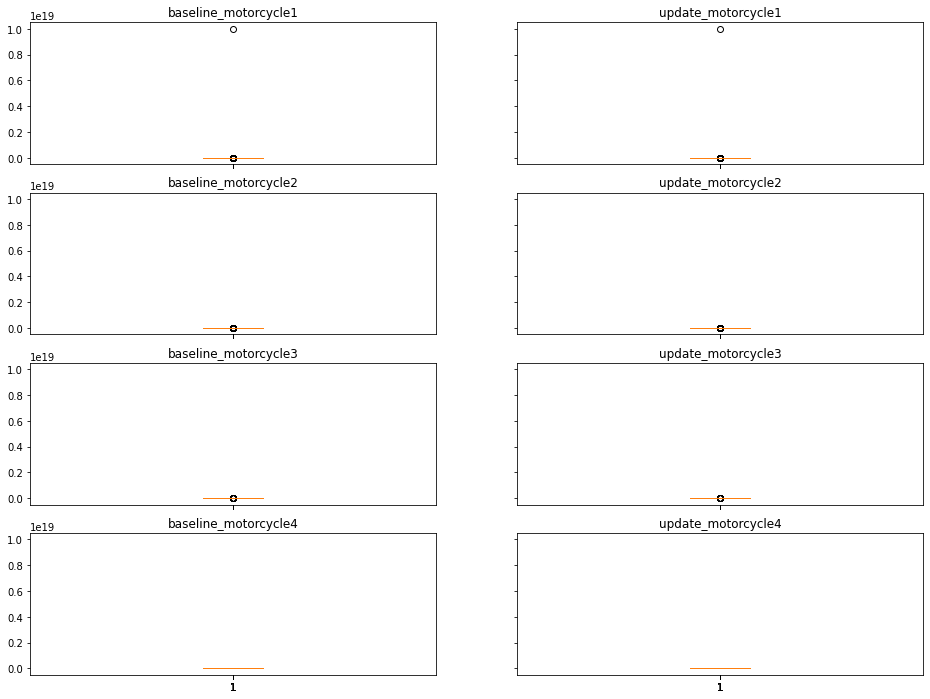

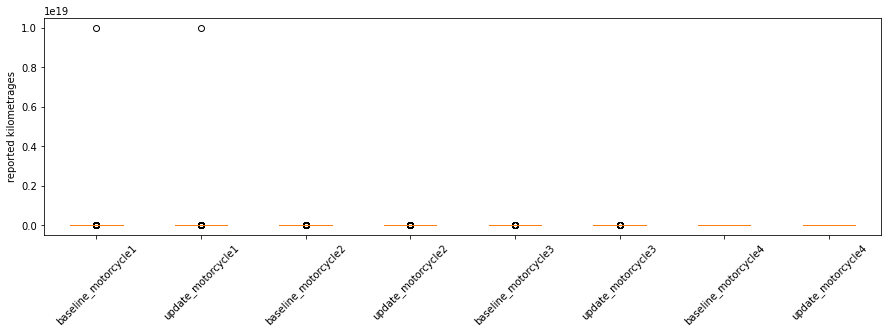

In [83]:
stats_before = plot_boxplots(data, return_stats=True)

**Our comments (Task 2.3 - continued):**

It is quite evident that at least some of the variables (baseline_motorcycle 1 + 2 and update_motorcycle 1 + 2) seems to be affected by outlier observations. Evidence for this is further seen from the calculated means and medians of the above plotted variables, since the mean is much higher than the median in case of the 1st motorcycles. Only for the 4th motorcycles (baseline_motorcycle4 and update_motorcycle4) it is seen that the median tends to be on the same level or even lower than the mean.

In [84]:
stats_before

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,7.937768e+14,7.937768e+14,67531.300289,92489.323041,71206.078582,95797.861325,105434.386364,132059.727273
median,5.600000e+04,8.218850e+04,56141.000000,82119.000000,62932.000000,90602.000000,105271.000000,136092.000000


**Our comments (Task 2.3 - continued):**

The obtained values of the mean and median do seem plausible when looking at the boxplots. Thus, this does not mean that the values seem reasonable when talking about the real-world case and the big difference between mean and medians strongly imply that there are outliers present in the attributes of motorcycles 1-3. 


**Our comments (Task 2.3 - continued):**

As evidently seen on the boxplots and investigations of mean and median values, the kilometrage variables are affected by outliers. The idea is to deal with these outliers and remove the corresponding rows (policies) in three different ways:

1. check for negative values 
2. use the IQR-method
3. after the above mentioned; qualitatively investigate the n-largest numbers within each row and manually evaluate whether they are plausible or not.


In [85]:
# simple check to see if any negative kilometrages were reported
np.any(data.iloc[:, 2:10] < 0)

False

Apparently, none of the kilometrage columns contain any negative value, so we do not need to consider this case any further. 

To find outliers in a quantitive way, we chose to use the so-called interquartile range. For that, we first determine the interquartile range, which is the difference between the 75% and 25% percentile, and then regard any value as an outlier that is further than 1.5 that difference away from the 75% or 25% percentile, respectively. Our function get_outliers then calculates the ids of rows where outliers are present, and returns those ids, so we can then use them in the drop function for pandas DataFrames to drop the specific rows. 

In [86]:
def get_outliers(part_of_df):
    """ Filters out outliers that is more than 1.5 times lower than the 25% quantile and above 1.5 times higher than the 
    75% quantile.
    
    Input is the sub-dataframe consisting of the columns assosiacted with kilometrage data.
    returns the indeces for rows that contains outliers.
    
    """
    
    outlier_indeces = []
    
    # Looping through each column
    for col_name in part_of_df:
        series = part_of_df[col_name]
        IQR = (series.quantile(0.75) - series.quantile(0.25)) 
        outlier_threshold = IQR * 1.5
        
        # calculating decision boundaries
        lower = series.quantile(0.25)-outlier_threshold
        upper = series.quantile(0.75)+outlier_threshold
        
        # Finds the union of outlier indeces from the previous column and the current column
        outlier_indeces_series = np.union1d(series.index[series < lower], series.index[series > upper])
        outlier_indeces = np.union1d(outlier_indeces, outlier_indeces_series)

    return [int(x) for x in outlier_indeces]

In [87]:
# Finding outliers from the kilometrage attributes
outlier_ids = get_outliers(data.iloc[:, 2:10])
data.loc[outlier_ids]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
43,Sign Bottom,43,119420,162182,210631.0,258131.0,NaN,NaN,NaN,NaN,2
49,Sign Top,49,117216,118351,206109.0,235937.0,NaN,NaN,NaN,NaN,2
91,Sign Bottom,8888888,36112,9999999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,1
120,Sign Bottom,120,271738,281573,39993.0,52153.0,NaN,NaN,NaN,NaN,2
125,Sign Bottom,125,209713,213965,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
13269,Sign Top,13261,195272,221425,212088.0,256090.0,6711.0,34709.0,NaN,NaN,3
13323,Sign Top,13315,51016,72505,244058.0,249649.0,120336.0,162853.0,172906.0,221448.0,4
13334,Sign Bottom,13326,243000,251276,NaN,NaN,NaN,NaN,NaN,NaN,1
13371,Sign Top,13363,292569,317565,83024.0,124197.0,NaN,NaN,NaN,NaN,2


In [88]:
# remove outlier policies from data
data = data.drop(outlier_ids)
data

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
13491,Sign Bottom,13483,32050,33346,NaN,NaN,NaN,NaN,NaN,NaN,1
13492,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,2
13494,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,2
13495,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,1


In [89]:
data.shape

(12186, 11)

So in total `13497 - 12186 = 1311` policies were removed due to either being outliers or not satisfying the specified requirements.

**Our comments:**

By looking at the boxplots after removing outliers based on the IQR method there does not seem to be as much skewness in the data distribution as before. This is further seen from the mean and median values (can be found below the boxplots) that are much more similar than before. It seems like there is some increase in reported kilometrages for the updated motorcycles compared to the baseline. Also it is seen that the distribution of the reported kilometrages for motorcycle4 is in general a bit higher - both in regards to the baseline and the updated report. Thus a potential hypothesis is that people with 4 motorcycles tend to ride their last registered (4th) motorcycle more than the other ones. 

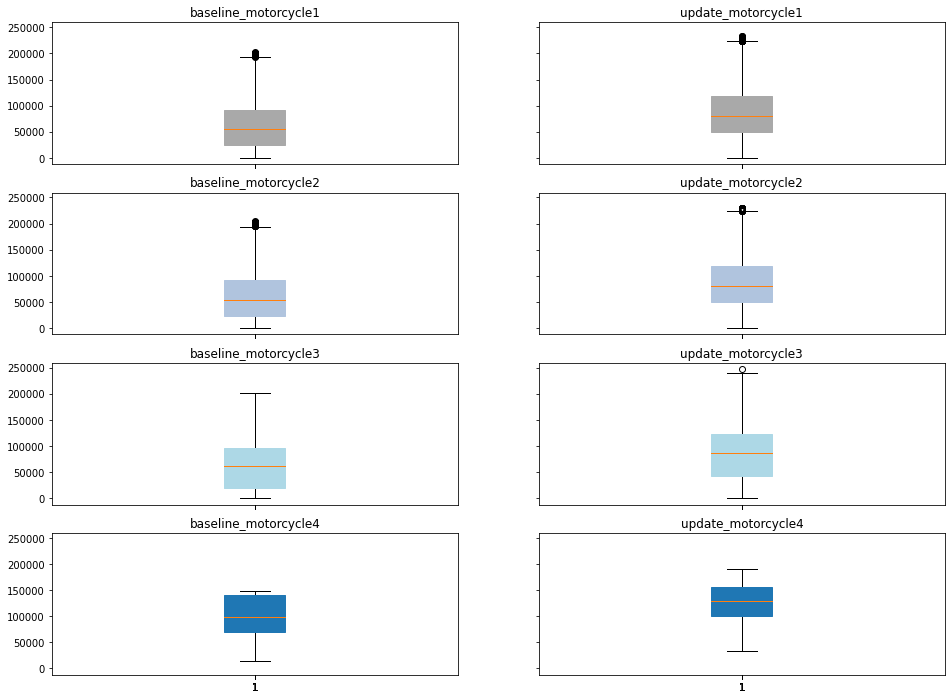

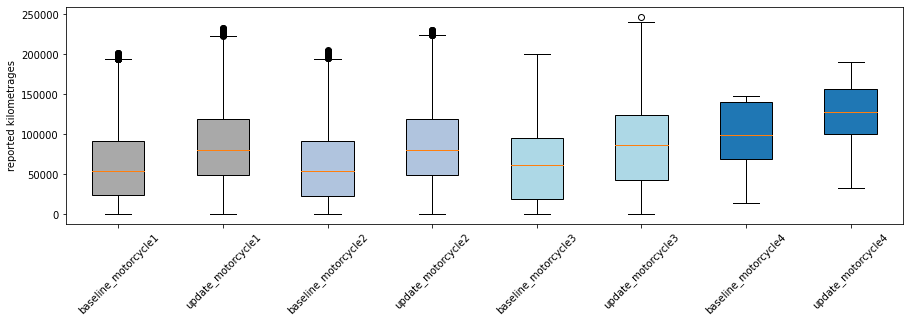

In [90]:
stats_after = plot_boxplots(data, return_stats=True)

In [91]:
stats_after

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,62447.368538,87333.940341,62476.752798,87376.070954,65507.767285,89832.128162,95622.657895,122373.131579
median,54482.000000,80082.500000,54430.000000,79876.000000,61175.000000,87184.000000,99032.500000,128087.500000


**Our comments:**

As a last check a qualitative analysis of the data is made. We define a function for finding the `n` most extreme (meaning either the largest or lowest) values within each attribute with information about kilometrages. This function will be applied to the dataframe with outliers from the IQR method are already removed and provides for an extra check and qualitative reasoning. Whether the largest or lowest values are regarded depends on the boolean value of the parameter `ascending`. As an output a dataframe of the n extreme values are created with indeces corresponding to the n'th largest value.

In [92]:
# function for finding the n_largest reported kilometrages for each column

def findNextremes_each_col(n=5, ascending=False):
    """returns n largest/smallest values for each axis in data"""
    n_largest_matrix = np.empty((n, 8))
    
    column_names = data.iloc[:,1:9].columns
    for i, column_name in enumerate(column_names):
        sorted_vals = data[column_name].sort_values(ascending=ascending)[:n]
        n_largest_matrix.T[i] = sorted_vals
    
    n_largest = pd.DataFrame(n_largest_matrix, index=[np.arange(n)+1])
    n_largest.columns = column_names
    return n_largest
    

In [93]:
# n largest values in each col for qualitative analysis of outliers
findNextremes_each_col(n=10, ascending=False)

,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4
1,13488.0,202217.0,232748.0,204942.0,230041.0,200865.0,246935.0,148268.0
2,13487.0,201755.0,232729.0,203983.0,229865.0,200000.0,240374.0,147822.0
3,13486.0,201217.0,231356.0,203808.0,229852.0,195280.0,229977.0,147750.0
4,13484.0,200873.0,231293.0,203568.0,229633.0,195000.0,229285.0,147569.0
5,13483.0,200776.0,230964.0,203457.0,229589.0,194326.0,227253.0,146367.0
6,13482.0,200687.0,230573.0,203449.0,229529.0,193704.0,225114.0,146241.0
7,13480.0,200531.0,230387.0,203240.0,229440.0,192445.0,224732.0,146000.0
8,13479.0,200454.0,230048.0,202691.0,229114.0,192331.0,224641.0,145681.0
9,13477.0,200334.0,229756.0,202580.0,228647.0,192144.0,223326.0,143617.0
10,13476.0,200302.0,229637.0,202450.0,228428.0,191741.0,220715.0,143537.0


In [94]:
findNextremes_each_col(n=10, ascending=True)

,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4
1,1.0,0.0,42.0,0.0,116.0,0.0,644.0,14255.0
2,2.0,0.0,82.0,0.0,845.0,0.0,794.0,14862.0
3,3.0,0.0,125.0,0.0,1020.0,0.0,1093.0,17911.0
4,4.0,0.0,603.0,0.0,1151.0,0.0,1626.0,18711.0
5,5.0,0.0,628.0,0.0,1298.0,0.0,1744.0,33864.0
6,6.0,0.0,705.0,0.0,1301.0,0.0,2656.0,33985.0
7,7.0,0.0,761.0,0.0,1563.0,5.0,3517.0,39000.0
8,8.0,0.0,820.0,0.0,1900.0,5.0,3967.0,39364.0
9,9.0,0.0,876.0,0.0,1910.0,6.0,5168.0,64428.0
10,10.0,0.0,927.0,0.0,2174.0,6.0,5631.0,64784.0


**Our comments(Task 2.3 - continued):**

From the first dataframes (of largest values) it does not seem like there are any more outliers in the high end, as it seems plausible to drive around 140.000-220.000 kilometers per year.

In regards to the second dataframe (of lower values) it is seen that the baseline_motorcycles mostly report quite low values of kilometrages. Many of these policies have 0 as the reported number of kilometrages. It is up for discussion whether these values makes sense or should be regarded as outliers - does it imply that people try to cheat with their reportings or could it just be due to the fact that the motorcycle from the baseline were newly bought in the previous year? We believe that most policy-owners of these policies are honest people and therefore follow the second explanation, which is why we do not regard a low reportage of kilometrages as outliers. 

Furthermore, depending on where the data is from, some people might buy and register a motercycle in autumn because it often is cheaper to buy out of season. This also means that you would not ride the bike before spring next year resulting in a 0 reported kilometrage. Using this logic, people would never have a baseline of 0 and an update of 0 unless they cheat. Noone buys a bike in the winter and does not ride it the next spring. 



---

**Our comments (Task 2.4):**

Outliers tend to influence the mean a lot while the median is somewhat uninfluenced. As the median marks the 50 % Quantile (i.e. the value for which 50 % of the values are smaller and 50 % of the values are larger), it does not take into account how big (or small) an outlier is, as it is still just one datapoint. While for the mean, an outlier being a thousand times bigger than the rest of the data can influence it to be even bigger than the second biggest number in the data, as they are all summed together. Therefore, we always want to determine whether a number is an outlier based on quantiles.




### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

**Our comments (Task 3.1):**

Choosing only the columns with baseline/update_motorcycle columns and taking the mean along axis 1 (i.e. for each rows) give us both averages. Then we calculate the the difference between both. We do not take the absolute value of the difference to check if there are cases where the updated value is lower than the baseline.

In [95]:
data['baseline_average'] = data[['baseline_motorcycle{}'.format(i) for i in range(1,5)]].mean(axis=1, skipna=True)
data['update_average'] = data[['update_motorcycle{}'.format(i) for i in range(1,5)]].mean(axis=1, skipna=True)
data['diff_average'] = (data['update_average'] - data['baseline_average'])

In [96]:
data.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


---

**Our comments (Task 3.2):**

One might propose aggregating by addition. The way it separates itself from aggregating by average is that policies with multiple motorcycles are visible because of larger numbers in both baseline and updated. This, however, could also be done by keeping the motorcycle_count as an attribute making the aggregating by addition obsolete. Aggregation by average will keep numbers comparable.

---

**Our comments (Task 3.3):**

We decided for a bar plot as motorcycle_count only consists of 4 distinct values, so we consider it a categorical variable rather than a numerical one (even though the categories are integer numbers). To get the sum, we group the dataframe by the motorcycle_count and then count the number of rows for each group, plotted then as a bar chart. To easily identify the differences and relations visually, we keep the y-axis of the plot as-is, and do not make it logarithmically, as also with the linear scaling we can determine that there are probably only around 50 policies with 4 motorcycles.

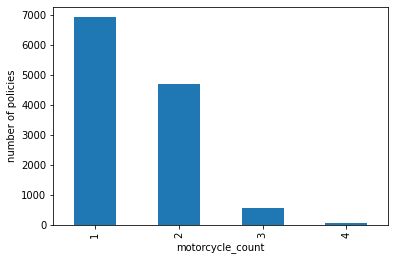

In [97]:
data.groupby('motorcycle_count')['id'].count().plot.bar()
plt.ylabel('number of policies');

In [98]:
print( 'number of policies with four motorcycles: {}'.format(data.groupby('motorcycle_count')['id'].count()[4]))
print( 'total number of policies {}'.format(data.groupby('motorcycle_count')['id'].count().sum()))

number of policies with four motorcycles: 38
total number of policies 12186


---

**Our comments (Task 3.4):**

Mean and standard deviation of updated average is calculated using build-in functions.

In [99]:
data['update_average'].mean()

87623.0273879862

In [100]:
data['update_average'].std()

44367.734756852784

---

**Our comments (Task 3.5):**

As we cleaned the data before, we now know that all rows with 4 motorcycles have a non-null value in the update_motorcylce4 column, so we can filter for non-nan values in this column to get only rows with 4 motorcycles. As the mean (and std) function in pandas only calculates the mean along one axis, we first call `.values` to get a `np.array` from the pandas DataFrame, as the mean and std functions in pandas return the mean and standard deviation for the whole array by default. 

In [101]:
data[data['update_motorcycle4'].notna()][['update_motorcycle{}'.format(i) for i in range(1,5)]].values.mean()

97989.19078947368

In [102]:
data[data['update_motorcycle4'].notna()][['update_motorcycle{}'.format(i) for i in range(1,5)]].values.std()

56181.242152862724

---

**Our comments (Task 3.6):**

We saw in the bar plot that we have few policies with four motorcycles compared to all the data we have (only $38$ policies out of $12000$). Calculating the mean and the std also shows that this small portion of the dataset differ from the full sample we have. We potentially loose a lot of dishonest clients with only one motorcycle. 
A more reasonable approach would be to just treat every policy as one data point. While on the one hand we loose the rich information on people having more motorcycles, on the other hand it is a reasonable assumption that a dishonest person might lie about the kilometrage on all of his motorcycles, so we probably wouldn't loose information by aggregating. 


### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

**Our comments (Task 4.1):**

First the data is grouped by the `condition` column and then we calculate the mean and the standard deviation with the Pandas built-in aggregation functions mean and std.

In [103]:
signed_top = data[data['condition'] == 'Sign Top']
signed_bot = data[data['condition'] == 'Sign Bottom']

In [104]:
data.groupby('condition')['update_average'].mean()

condition
Sign Bottom    93607.554556
Sign Top       81867.785067
Name: update_average, dtype: float64

In [105]:
data.groupby('condition')['update_average'].std()

condition
Sign Bottom    44019.934608
Sign Top       43940.869306
Name: update_average, dtype: float64

---
To plot the two histograms, we again write a new function, that creates two subplots and then create a histogram for top or bottom in each. With stack, we receive a one-dim Series from the DataFrame with 4 columns for each motorcycle. Combining this with dropna gives us a Pandas Series of all values in any of the update_motorcycle columns. 

In [106]:
def plotKilometrageHistograms(top_km, bot_km):
    #signed_top_update_kilometrages = signed_top[['update_motorcycle{}'.format(i) for i in range(1,5)]].stack().dropna()
    #signed_bot_update_kilometrages = signed_bot[['update_motorcycle{}'.format(i) for i in range(1,5)]].stack().dropna()

    fig, axs = plt.subplots(1, 2, figsize=(16,4), sharex=True, sharey=True)

    plt.subplot(1, 2, 1)
    top_km.plot.hist(bins=50);
    plt.xlabel('kilometrage')
    plt.title('Kilometrage histogram for contracts signed at the top');

    plt.subplot(1, 2, 2)
    bot_km.plot.hist(bins=50);
    plt.xlabel('kilometrage')
    plt.title('Kilometrage histogram for contracts signed at the bottom');

    plt.show()

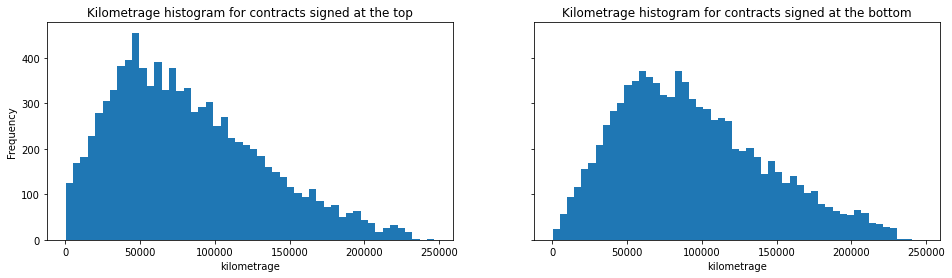

In [107]:
signed_top_update_kilometrages = signed_top[['update_motorcycle{}'.format(i) for i in range(1,5)]].stack().dropna()
signed_bot_update_kilometrages = signed_bot[['update_motorcycle{}'.format(i) for i in range(1,5)]].stack().dropna()

plotKilometrageHistograms(top_km=signed_top_update_kilometrages,
                          bot_km=signed_bot_update_kilometrages)


**Our comments (Task 4.2):**

To investigate whether the difference between the two groups seen in Task 4.1 is significant we use a Kolmogorov Smirnoff-test implemented from the `scipy` module.

In [108]:
test = stats.ks_2samp(signed_bot_update_kilometrages, signed_top_update_kilometrages)
print(f"statistic: {test.statistic}\np-value: {test.pvalue}")

statistic: 0.11332507314139688
p-value: 5.075414732535318e-51


**Our comments (Task 4.2 - continued):**

With a 95% level of confidence we did a Kolmogorov Smirnoff-test giving a p-value of 5.07*10^-51. That means we reject the null hypothesis of the Kolmogorov Smirnoff-test and conclude these two distributions do in fact differ from each other. We can also do a t-test to determine wheter the means differ significantly. Again, we reject the null hypothesis ($\mu_1 = \mu_2$), so we conclude the difference is significant. 

In [109]:
test = stats.ttest_ind(signed_bot_update_kilometrages, signed_top_update_kilometrages)
print(f"statistic: {test.statistic}\np-value: {test.pvalue}")

statistic: 16.01976168306241
p-value: 2.3080024308598416e-57


---

**Our comments (Task 4.3):**

Given the low p-value we can now determine that the results are indeed significantly different from each other. Since the mean of "Signing on top" is lower than "Signing on bottom", we derive from the statistical test that the people signing on top of the policies report a significantly lower kilometrage readings than the people signing on the bottom. Based on the statistical test, one could therefore conclude that signing on top increases dishonesty if you define honesty by reporting a low kilometrage.

---

**Our comments (Task 4.4):**

If there were no interventions and assignment to one of the groups happened uniformly at random, signing at top or bottom should not make any difference at all, and the two samples should usually come from the same distribution (but they are not. Which is backed up by the statistical test and the difference between the mean and std).  


---

**Our comments (Task 4.5):**

To get mean and standard deviation of the baseline motorcycles for signed top and signed bottom. After choosing only the respective columns from the dataframe, we then convert them, as above, to a Series of the non-na values by first calling stack() to make it a one-dim Series and then dropping nan values. With the built in functions, we get mean and std of the Series. Finally, we again call our already defined function. 

In [110]:
signed_bot_baseline_kilometrages = signed_bot[['baseline_motorcycle{}'.format(i) for i in range(1,5)]].stack().dropna()
signed_top_baseline_kilometrages = signed_top[['baseline_motorcycle{}'.format(i) for i in range(1,5)]].stack().dropna()

In [111]:
mean_bot_base = signed_bot_baseline_kilometrages.values.mean()
std_bot_base = signed_bot_baseline_kilometrages.values.std()

print(f"Signed bottom:\n mean = {mean_bot_base}, std. dev. = {std_bot_base}")

Signed bottom:
 mean = 69768.1760324983, std. dev. = 46869.86326468633


In [112]:
mean_top_base = signed_top_baseline_kilometrages.values.mean()
std_top_base = signed_top_baseline_kilometrages.values.std()

print(f"Signed top:\n mean = {mean_top_base}, std. dev. = {std_top_base}")

Signed top:
 mean = 55765.530890960326, std. dev. = 47157.61418473966


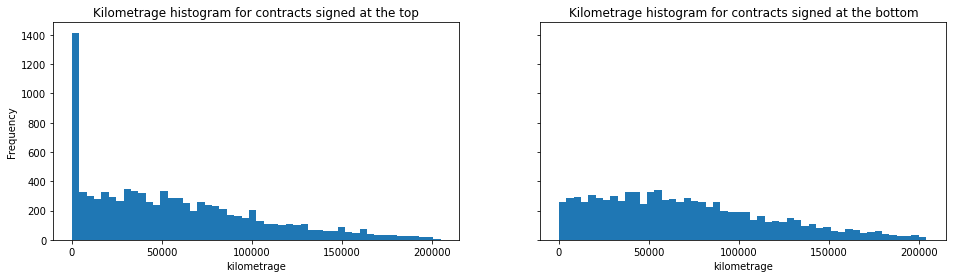

In [113]:
plotKilometrageHistograms(top_km=signed_top_baseline_kilometrages,
                          bot_km=signed_bot_baseline_kilometrages)

**Our comments (Task 4.6):**

Statistical Komogorov Smirnoff test, to determine wheter the two samples are drwan from the same distribution

In [114]:
test = stats.ks_2samp(signed_bot_baseline_kilometrages, signed_top_baseline_kilometrages)
print(f"statistic: {test.statistic}\np-value: {test.pvalue}")

statistic: 0.13975529010157092
p-value: 1.7641252073063195e-77


**Our comments (Task 4.6):**


 The small p value means we reject our null hypothesis, so the distributions are different. We can also check wheter the means are differ significantly with a t-test, we reject the null hypothesis, which means the means differ significanlty.

In [115]:
test = stats.ttest_ind(signed_bot_baseline_kilometrages, signed_top_baseline_kilometrages)
print(f"statistic: {test.statistic}\np-value: {test.pvalue}")

statistic: 20.022109296852076
p-value: 3.1901231515658175e-88


**Our comments (Task 4.6 continued):**

This goes to show that there is a difference between the distributions of signing at the top of the document and signing at the bottom of the document. As there were no intervention on signing on either top or bottom in the baseline and since people were chosen randomly to signing at either top/bottom on the updated policy, we should expect that the two distributions visualized above would not differ. This result suggests that there is a problem with the baseline data - we have a bias! In other words, the randomized trials might not have been as random as stated !

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

**Our comments (Task 5.1):**

We use the matplotlib function for histograms on both baseline and update_motorcycle1 to get the histograms.

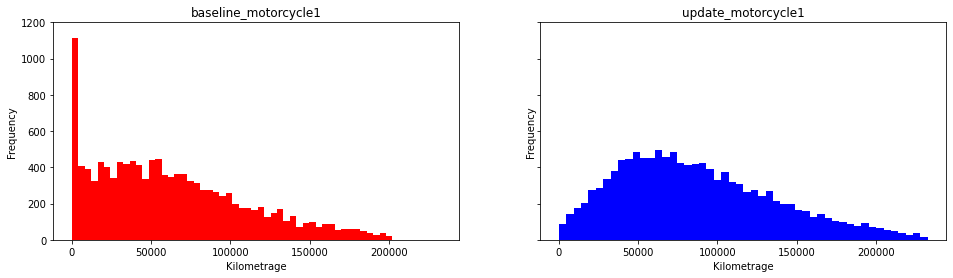

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(16,4), sharex=True, sharey=True)
plt.subplot(1, 2, 1)
plt.hist(data['baseline_motorcycle1'], bins=50, color='r')
plt.title(data['baseline_motorcycle1'].name)
plt.ylim([0,1200])
plt.xlabel('Kilometrage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['update_motorcycle1'], bins=50, color='b')
plt.title(data['update_motorcycle1'].name)
plt.ylim([0,1200])
plt.xlabel('Kilometrage')
plt.ylabel('Frequency')
plt.show()

---

**Our comments (Task 5.2):**

With the same function, we plot the histogram of the differences. 

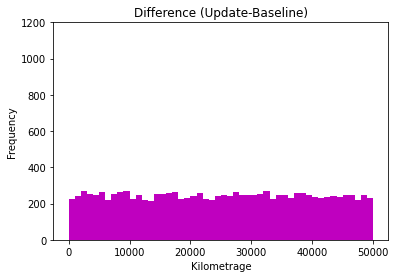

In [117]:
plt.hist(data['update_motorcycle1']-data['baseline_motorcycle1'], bins=50, color='m')
plt.title('Difference (Update-Baseline)')
plt.ylim([0,1200])
plt.xlabel('Kilometrage')
plt.ylabel('Frequency')
plt.show()


---

**Our comments (Task 5.3):**

From our point of view, it is unreasonable to see a uniform distribution of the differences here. Assuming that the time difference between update and baseline contract are relatively equal (no huge differences of e.g. several decades between mean and maximum time difference from baseline to update), we would assume that the difference follows a normal distribution. That is because we would think that the majority of bikers ride their bike about the same distance per year, with some deviating values to the top and the bottom. Assuming the time differences to be about the same, this should show as more mass around the median of the differences, and less on the sides (both 50k and 0k).

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

**Our comments (Task 6.1):**

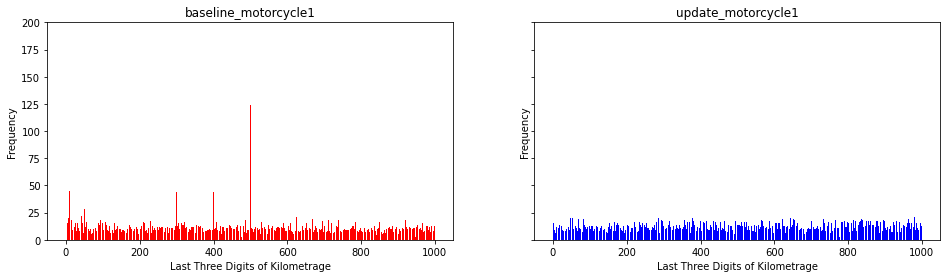

In [118]:
data_last_digits = pd.concat([data['baseline_motorcycle1'], data['update_motorcycle1']],axis=1)
data_last_digits = data_last_digits % 1000

data_last_digits_baseline = data_last_digits.groupby('baseline_motorcycle1')['baseline_motorcycle1'].count()
data_last_digits_update = data_last_digits.groupby('update_motorcycle1')['update_motorcycle1'].count()

fig, axs = plt.subplots(1, 2, figsize=(16,4), sharex=True, sharey=True)
plt.subplot(1, 2, 1)
plt.bar(data_last_digits_baseline.index, data_last_digits_baseline, color='r')
plt.title(data_last_digits['baseline_motorcycle1'].name)
plt.ylim([0,200])
plt.xlabel('Last Three Digits of Kilometrage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(data_last_digits_update.index, data_last_digits_update, color='b')
plt.title(data_last_digits['update_motorcycle1'].name)
plt.ylim([0,200])
plt.xlabel('Last Three Digits of Kilometrage')
plt.ylabel('Frequency')
plt.show()

---

**Our comments (Task 6.2):**

The baseline distribution contains peaks at e.g. '000' and '500', whereas the update seems to be distributed pretty evenly throughout the possible digits. A factor contributing to the tendency of many occuring 0's might be the fact that a lot of baseline motorcycles have a kilometrage reporting of zero, meaning that they are brand new motorcycles when registered. Thus, after a year of driving most of the zeros would increase and result in the more uniform distribution seen in the plot for updated kilometrage reportings. This tendency does not occur in the updated motorcycles as they are defined by having a preceding baseline policy.  


In [119]:
print(f"New motorcycles (1) in baseline:\t\t {data[data.baseline_motorcycle1==0].shape[0]}")
print(f"New motorcycles (1) in updated policies:\t {data[data.update_motorcycle1==0].shape[0]}")

New motorcycles (1) in baseline:		 113
New motorcycles (1) in updated policies:	 0


---

**Our comments (Task 6.3):**

The tendency seen in the baseline plot with a large spike on "000" and minor spikes on the remaining values of 100's could be that a lot of people tend to approximate their kilometrage reportings. People might tend to put in rounded numbers when they have to get creative and make up a number (thereby being dishonest in the defined meaning). Furthermore, as argued in 6.2 the large spike on "000" is somewhat due to newly registered motorcycles in the baseline contract.

In the plots in task 6.1 we see that the baseline has spikes at digits of 100's (like 100, 200, etc.). For this data all policies were signed at the bottom and as argued it seems like a few people tend to approximate their reports. In the updated policies, where half the people sign at the top this trend seems to stop. If the intervention on the position of signature (top or bottom) was in fact done completely random, this trend would have continued in the updated policies, as half of the people would still approximate their kilometrage readings. This suggests that the people who were prone to approximate their reportings (thereby being dishonest) were given the "sign top" feature in the update, as the tendency of approximating the last three digits seem to be COMPLETELY cancelled. If this is true, the randomized trials might not have been as random as we thought.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

**Our comments (Task 7.1):**

To load the fonts dataset, we simply call read_csv with the default parameters. We then merge it with our normal dataframe by merging both on the 'id' column (which is necessary, as we dropped some rows earlier).

In [120]:
fonts = pd.read_csv('./data/fonts.csv')
fonts.head()

,id,font
0,1,Helvetica
1,2,Helvetica
2,3,Helvetica
3,4,Helvetica
4,5,Arial


In [121]:
print(f"fonts shape: {fonts.shape}\ndata shape {data.shape}")

fonts shape: (13487, 2)
data shape (12186, 14)


**Our comments (Task 7.1):**

We use the id column as keys in both dataframe for the merge.

In [122]:
data_with_fonts = data.merge(fonts, left_on='id', right_on='id')
data_with_fonts.shape

(12186, 15)

---

**Our comments (Task 7.2):**

Our two samples are similar in size.

In [123]:
data_with_fonts.groupby('font')['id'].count()

font
Arial        6091
Helvetica    6095
Name: id, dtype: int64

Plotting is again done with matplotlib's hist function. 

Text(0, 0.5, 'Frequency')

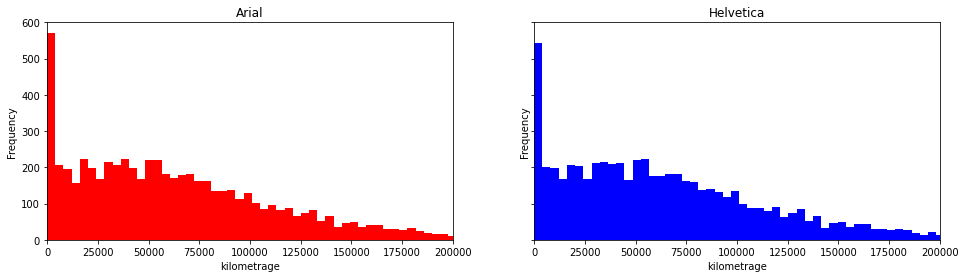

In [124]:
data_arial = data_with_fonts[data_with_fonts['font'] == 'Arial']
data_helvetica = data_with_fonts[data_with_fonts['font'] == 'Helvetica']

fig, axs = plt.subplots(1, 2, figsize=(16,4), sharex=True, sharey=True)

axs[0].hist(data_arial['baseline_motorcycle1'], bins=50, color='r')
axs[0].set_title('Arial')
axs[0].set_xlim([0, 200000])
axs[0].set_ylim([0, 600])
axs[0].set_xlabel('kilometrage')
axs[0].set_ylabel('Frequency')

axs[1].hist(data_helvetica['baseline_motorcycle1'], bins=50, color='b')
axs[1].set_title('Helvetica')
axs[1].set_xlabel('kilometrage')
axs[1].set_ylabel('Frequency')


**Our comments (Task 7.2):**

The two sample sizes are almost the same and it seems the two samples are drawn from the same distribution. The font should not effect the distribution of kilometrage. Let's check this. To investigate, whether the two samples come from the same distribution we could use a Kolmogorov-Smirnov test, but our sample is pretty large, so a test would likely be rejected, instead we take a look at the QQ plot.

Indeed, the KS test is rejected

In [129]:
stats.ks_2samp(data_arial['baseline_motorcycle1'], data_helvetica['baseline_motorcycle1'])

KstestResult(statistic=0.049421159448124016, pvalue=6.517564351549154e-07)

In the QQ (quantile-quantile) plot, we compare the two probability distributions by plotting their quantiles against each other. We are given two samples so all we need to do is sort the observations and plot them. The result suggests that the two distributions are really similar, almost as if one of them was generated from the other one...

Text(0.5, 0, 'Helvetica')

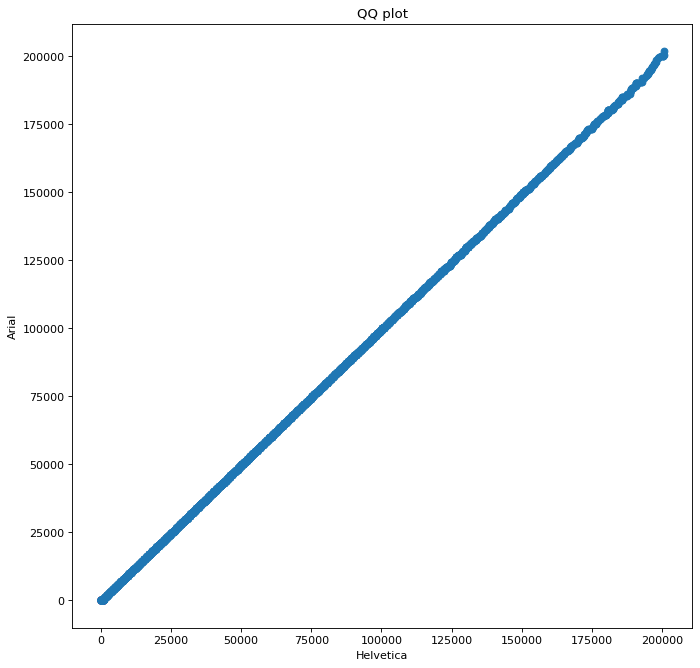

In [143]:
sort_hel = np.sort(np.array(data_helvetica['baseline_motorcycle1']))
sort_arial = np.sort(np.array(data_arial['baseline_motorcycle1']))
lenth = min(len(sort_hel),len(sort_arial))
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(sort_hel[:lenth], sort_arial[:lenth])
plt.title('QQ plot')
plt.ylabel('Arial')
plt.xlabel('Helvetica')

---

**Our comments (Task 7.3):**

We again decided for bar plots. For the last 3 digits, we first take modulo 1000. Then, we group the values and count them, to receive the counts for our bar plot. We can then simply plot all 4 possible combinations of font type and base/update. 

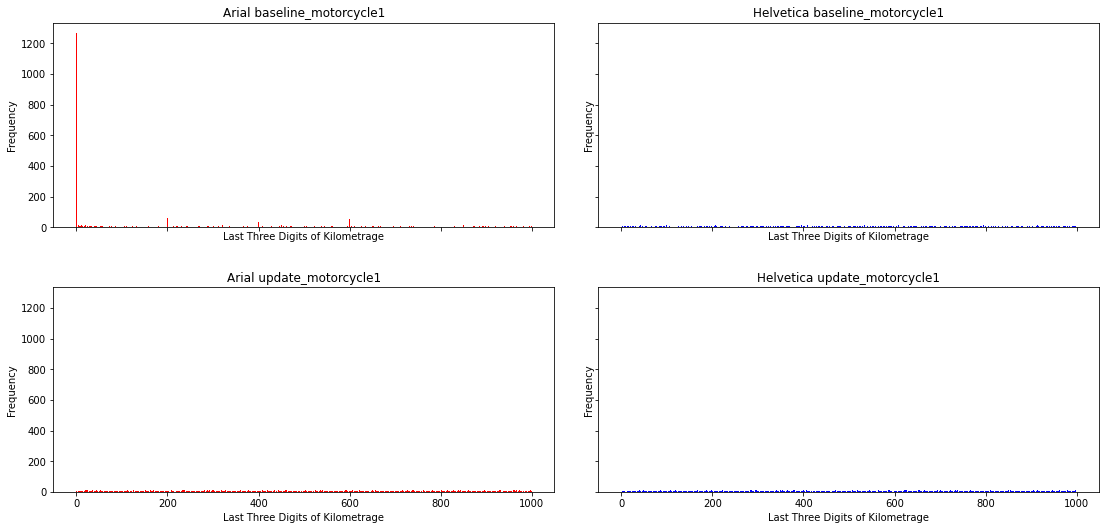

In [126]:
df_last_digits_arial_base = data_arial['baseline_motorcycle1'] % 1000
df_last_digits_helvetica_base = data_helvetica['baseline_motorcycle1'] % 1000
df_last_digits_arial_update = data_arial['update_motorcycle1'] % 1000
df_last_digits_helvetica_update = data_helvetica['update_motorcycle1'] % 1000

df_last_digits_arial_base = df_last_digits_arial_base.groupby(df_last_digits_arial_base).count()
df_last_digits_helvetica_base = df_last_digits_helvetica_base.groupby(df_last_digits_helvetica_base).count()
df_last_digits_arial_update = df_last_digits_arial_update.groupby(df_last_digits_arial_update).count()
df_last_digits_helvetica_update = df_last_digits_helvetica_update.groupby(df_last_digits_helvetica_update).count()

fig, axs = plt.subplots(2, 2, figsize=(16,8), sharex=True, sharey=True)

axs[0,0].bar(df_last_digits_arial_base.index, df_last_digits_arial_base, color='r')
axs[0,0].set_title('Arial ' + data_arial['baseline_motorcycle1'].name)
axs[0,0].set_xlabel('Last Three Digits of Kilometrage')
axs[0,0].set_ylabel('Frequency')

axs[0,1].bar(df_last_digits_helvetica_base.index, df_last_digits_helvetica_base, color='b')
axs[0,1].set_title('Helvetica ' + data_helvetica['baseline_motorcycle1'].name)
axs[0,1].set_xlabel('Last Three Digits of Kilometrage')
axs[0,1].set_ylabel('Frequency')

axs[1,0].bar(df_last_digits_arial_update.index, df_last_digits_arial_update, color='r')
axs[1,0].set_title('Arial ' + data_arial['update_motorcycle1'].name)
axs[1,0].set_xlabel('Last Three Digits of Kilometrage')
axs[1,0].set_ylabel('Frequency')

axs[1,1].bar(df_last_digits_helvetica_update.index, df_last_digits_helvetica_update, color='b')
axs[1,1].set_title('Helvetica ' + data_helvetica['update_motorcycle1'].name)
axs[1,1].set_xlabel('Last Three Digits of Kilometrage')
axs[1,1].set_ylabel('Frequency')

fig.tight_layout(pad=3.0)

**Our comments (Task 7.3):**

In the Helvectica policies the distribution of the last three digits seems uniform but the Arial base policies have greater mass especially concentrated on $000$. Let's see it on log scale.  

Therefore, we simply set the y axis to be logarithmic with log=True in the bar plot functions. Note that we were not able to choose sharey=True here, as it lead to incorrect graphs for us (we saw that the 0 peak for Arial baseline_motorcycle1 gave us less than 10^2 when it should be well above 10^3). We therefore set log=True and manually set every y-axis to cover the range of 1 to 2000 by set_ylim.

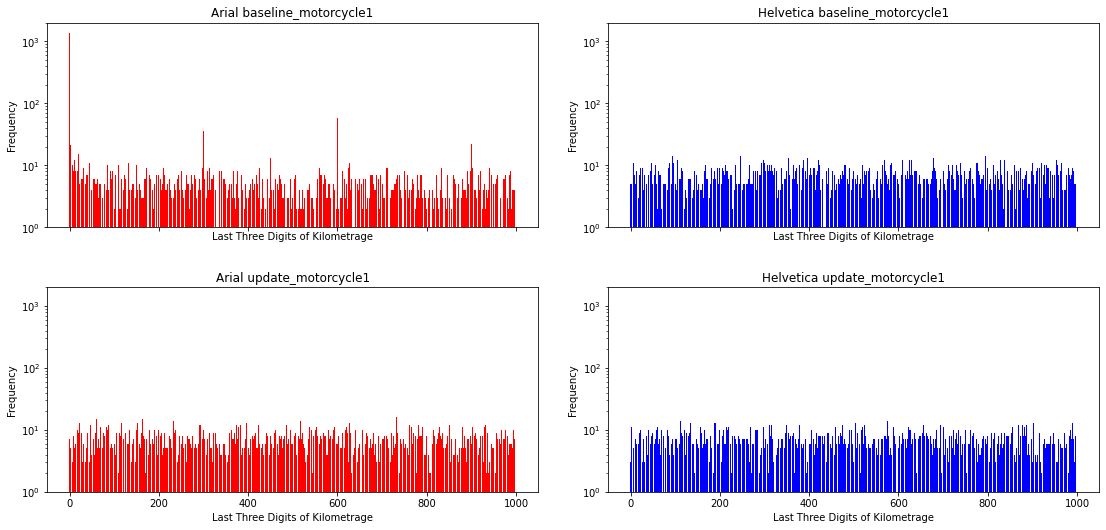

In [66]:
df_last_digits_arial_base = data_arial['baseline_motorcycle1'] % 1000
df_last_digits_helvetica_base = data_helvetica['baseline_motorcycle1'] % 1000
df_last_digits_arial_update = data_arial['update_motorcycle1'] % 1000
df_last_digits_helvetica_update = data_helvetica['update_motorcycle1'] % 1000

df_last_digits_arial_base = df_last_digits_arial_base.groupby(df_last_digits_arial_base).count()
df_last_digits_helvetica_base = df_last_digits_helvetica_base.groupby(df_last_digits_helvetica_base).count()
df_last_digits_arial_update = df_last_digits_arial_update.groupby(df_last_digits_arial_update).count()
df_last_digits_helvetica_update = df_last_digits_helvetica_update.groupby(df_last_digits_helvetica_update).count()

fig, axs = plt.subplots(2, 2, figsize=(16,8), sharex=True, sharey=False)

axs[0,0].bar(df_last_digits_arial_base.index, df_last_digits_arial_base, color='r', log=True)
axs[0,0].set_title('Arial ' + data_arial['baseline_motorcycle1'].name)
axs[0,0].set_xlabel('Last Three Digits of Kilometrage')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_ylim([1, 2000])

axs[0,1].bar(df_last_digits_helvetica_base.index, df_last_digits_helvetica_base, color='b', log=True)
axs[0,1].set_title('Helvetica ' + data_helvetica['baseline_motorcycle1'].name)
axs[0,1].set_xlabel('Last Three Digits of Kilometrage')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_ylim([1, 2000])

axs[1,0].bar(df_last_digits_arial_update.index, df_last_digits_arial_update, color='r', log=True)
axs[1,0].set_title('Arial ' + data_arial['update_motorcycle1'].name)
axs[1,0].set_xlabel('Last Three Digits of Kilometrage')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_ylim([1, 2000])

axs[1,1].bar(df_last_digits_helvetica_update.index, df_last_digits_helvetica_update, color='b', log=True)
axs[1,1].set_title('Helvetica ' + data_helvetica['update_motorcycle1'].name)
axs[1,1].set_xlabel('Last Three Digits of Kilometrage')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_ylim([1, 2000])

fig.tight_layout(pad=3.0)

In [67]:
print(f'arial baseline zeros {sum(df_last_digits_arial_base == 0)}')
print(f'helvetica baseline zeros {sum(df_last_digits_helvetica_base == 0)}')

arial baseline zeros 0
helvetica baseline zeros 0


---

**Our comments (Task 7.4):**

First of all we saw that the distribution of the last three digits for both fonts (Arial and Helvetica) are significantly different. By further investigating the baseline and updated policies with different fonts it becomes clear why. It seems that in the Arial baseline, there are more than 1000 bikes ending with "000" of which 113 are new bikes (as previously shown). In the Helvetica baseline, there is no spike at "000". If the two fonts should be equally valid we would expect no difference between their distributions, so the Helvetica baseline data should have a similar distribution to the Arial baseline, yet it seems more uniform than the Arial one. The spikes at the multiples of "100" can be explained by approximations of kilometrage by the policy holders which is not to be seen in the Helvetica baseline data meaning that no approximation happened there. The approximated values in the Arial font policies seem plausible - as it seems like human behaviour - for several reasons (like newly bought bikes, dishonesty, etc.) as argued in the Tasks 6.2 and 6.3 for which reason it becomes evident that the Helvetica policies are fabricated !

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

**Our comments (Task 8):**

- We first conclude that people signing their updated policies on the top of a document were in fact reporting lower kilometrage readings than people signing at the bottom - this was contradictory to the originally stated hypothesis about dishonesty (task 4). Further investigations on the baseline data reveals that there is a bias in the data (task 4). Through analysis of the last three digits of kilometrage reportings we found that this bias is in fact because the experimental setup of randomized trial seems invalid and suggests that people with more dishonest baseline reportings were actively asked to sign at the top of the updated policies (task 6).
    
    The reported kilometrage readings in the updated contracts are "FISHY" as their difference to the baseline reportings is uniformly distributed. If this was in fact correct, the policy holders could just as well have rolled a dice to determine how many additional kilometrages between 0 and 50.000 kilometers each policy owner should report (task 5). 
    
    There is strong evidence that policies written with the font Helvetica are fabricated which is seen when looking at the last three digits of the reported kilometrages from the baseline data. As is seen from analysis of the Arial-written policies the policy holders tend to approximate their reportings to the nearest 100's of kilometers which seems like human behaviour (and possibly dishonesty). This tendency is not seen in the Helvitica-written policies that instead comes from a somehow uniform distribution (task 7).
    

- Based on these analyses we hypothesize that;
		1) the experiment was not done as a randomized trial.
		2) the policies written with Helvetica font was fabricated.

- We are not convinced that the trials are truly randomized. Therefore, the study does not ensure us that signing top does really increase honesty. Without randomised trials there could be all sorts of hidden confounders that we have not discovered and encounted in the preceeding analyses.


---

**Additional plots:**

In [199]:
data_a_top_base = data_with_fonts[(data_with_fonts['font'] == 'Arial') & (data_with_fonts['condition'] == 'Sign Top')]['baseline_motorcycle1'] #% 1000
data_a_bot_base = data_with_fonts[(data_with_fonts['font'] == 'Arial') & (data_with_fonts['condition'] == 'Sign Bottom')] ['baseline_motorcycle1'] #% 1000
data_h_top_base = data_with_fonts[(data_with_fonts['font'] == 'Helvetica') & (data_with_fonts['condition'] == 'Sign Top')]['baseline_motorcycle1'] #% 1000
data_h_bot_base = data_with_fonts[(data_with_fonts['font'] == 'Helvetica') & (data_with_fonts['condition'] == 'Sign Bottom')]['baseline_motorcycle1'] #% 1000
data_a_top_up  = data_with_fonts[(data_with_fonts['font'] == 'Arial') & (data_with_fonts['condition'] == 'Sign Top')]['update_motorcycle1']#% 1000 
data_a_bot_up = data_with_fonts[(data_with_fonts['font'] == 'Arial') & (data_with_fonts['condition'] == 'Sign Bottom')]['update_motorcycle1']  #% 1000
data_h_top_up = data_with_fonts[(data_with_fonts['font'] == 'Helvetica') & (data_with_fonts['condition'] == 'Sign Top')]['update_motorcycle1'] #% 1000
data_h_bot_up = data_with_fonts[(data_with_fonts['font'] == 'Helvetica') & (data_with_fonts['condition'] == 'Sign Bottom')]['update_motorcycle1'] #% 1000

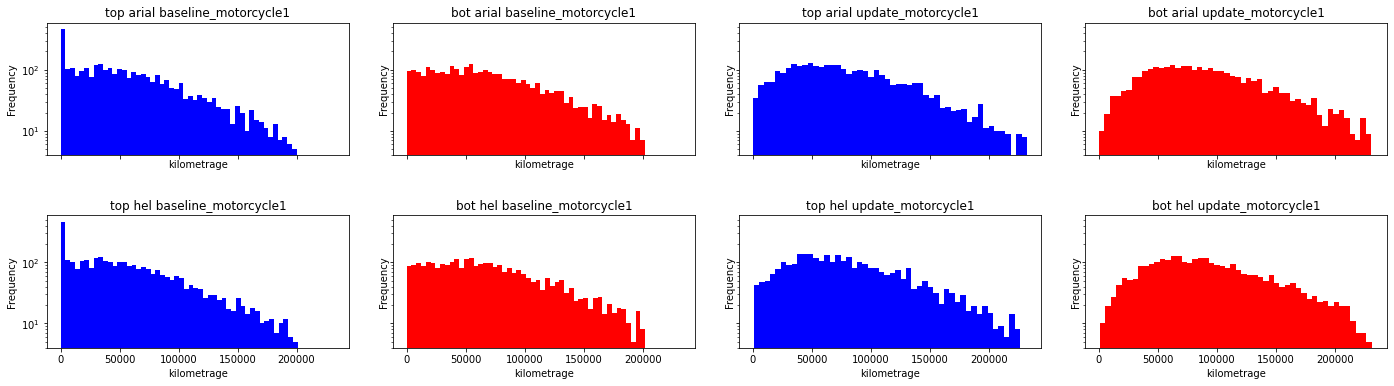

In [194]:
sign = ['top ', 'bot ','top ', 'bot ','top ', 'bot ','top ', 'bot ']
color= ['b', 'r','b', 'r','b', 'r','b', 'r']
font = ['arial ', 'arial ', 'arial ', 'arial ', 'hel ', 'hel ', 'hel ', 'hel ']
list_= [data_a_top_base, data_a_bot_base, data_a_top_up,  data_a_bot_up, data_h_top_base, data_h_bot_base, data_h_top_up, data_h_bot_up]

fig, axs = plt.subplots(2, 4, figsize=(20,6), sharex=True, sharey=True)

for j in range(2):
    for i in range(4):
        axs[j,i].hist(list_[i+j*4] , bins=50,color=color[i+4*j])
        axs[j,i].set_yscale('log')
        axs[j,i].set_title(sign[i+j*4] + font[i+j*4] + list_[i+j*4].name)
        axs[j,i].set_xlabel('kilometrage')
        axs[j,i].set_ylabel('Frequency')

fig.tight_layout(pad=3.0)

Text(0.5, 1.0, 'helvetica signed top')

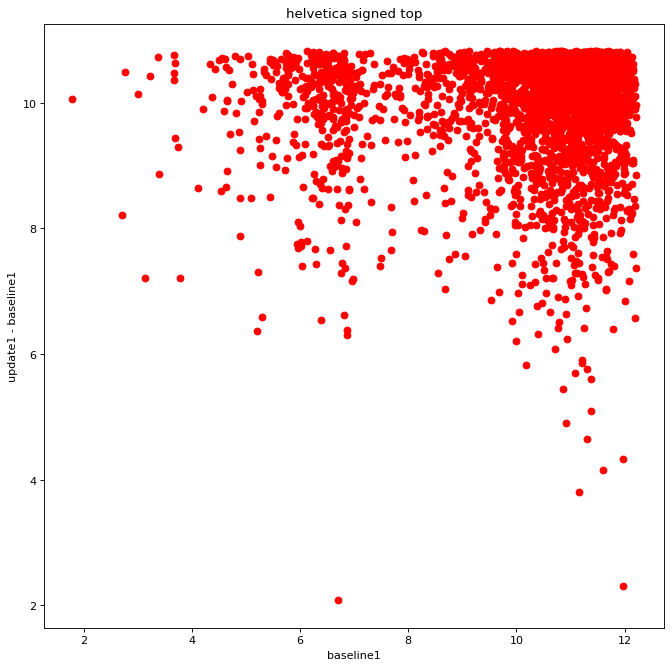

In [202]:
colormap = {'Sign Top': 'blue', 'Sign Bottom': 'green'}
data_top_hel = data_with_fonts[(data_with_fonts['condition']== 'Sign Top') &  (data_with_fonts['font']== 'Helvetica')]
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(np.log(data_top_hel['baseline_motorcycle1']), np.log(data_top_hel['update_motorcycle1']-data_top_hel['baseline_motorcycle1']), color= 'r')
plt.xlabel('baseline1')
plt.ylabel('update1 - baseline1')
plt.title('helvetica signed top')

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'all data')

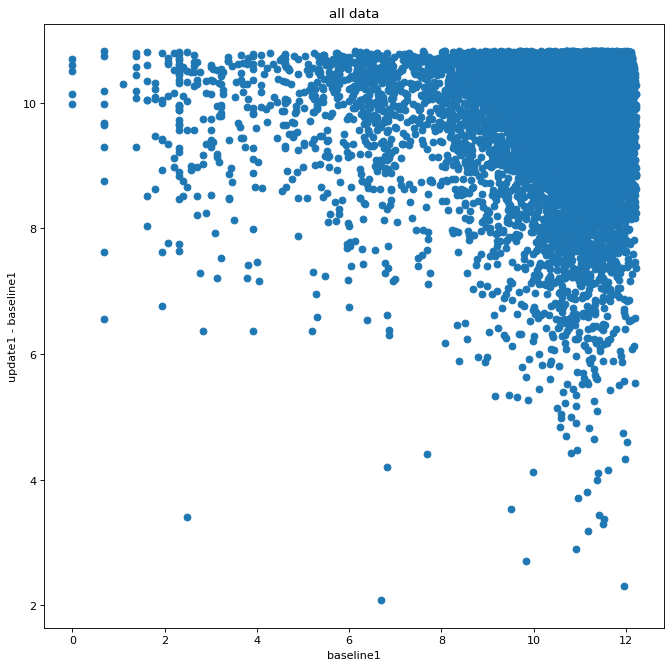

In [201]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(np.log(data['baseline_motorcycle1']), np.log(data['update_motorcycle1']-data['baseline_motorcycle1']))
plt.xlabel('baseline1')
plt.ylabel('update1 - baseline1')
plt.title('all data')